# **Part02 딥러닝 기반 추천 시스템 사례 및 구현**

# 2-1. Surprise 패키지 개요<br>
- `pip install scikit-surprise`

# 2-2. Surprise 기초 사용 및 실습

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import surprise

In [3]:
data = surprise.Dataset.load_builtin('ml-100k')

Dataset ml-100k could not be found. Do you want to download it? [Y/n] y
Trying to download dataset from http://files.grouplens.org/datasets/movielens/ml-100k.zip...
Done! Dataset ml-100k has been saved to C:\Users\Affinity/.surprise_data/ml-100k


In [21]:
dt = pd.DataFrame(data.raw_ratings)
dt.head()

,0,1,2,3
0,196,242,3.0,881250949
1,186,302,3.0,891717742
2,22,377,1.0,878887116
3,244,51,2.0,880606923
4,166,346,1.0,886397596


In [26]:
df = pd.DataFrame(data.raw_ratings, columns=['user', 'item', 'rate', 'id'])
del df['id']
print(df.shape)
df.head()

(100000, 3)


,user,item,rate
0,196,242,3.0
1,186,302,3.0
2,22,377,1.0
3,244,51,2.0
4,166,346,1.0


In [48]:
df.groupby(['user', 'item'])['rate'].mean().unstack().head() # df.set_index(['user', 'item']).unstack()['rate']

item,1,10,100,1000,1001,1002,1003,1004,1005,1006,...,990,991,992,993,994,995,996,997,998,999
user,,,,,,,,,,,,,,,,,,,,,
1,5.0,3.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,4.0,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
101,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
102,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN


In [51]:
df.set_index(['user', 'item']).unstack()

rate                                               ...                    \
item    1   10  100 1000 1001 1002 1003 1004 1005 1006  ...  990 991 992  993   
user                                                    ...                     
1     5.0  3.0  5.0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN NaN NaN  NaN   
10    4.0  NaN  5.0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN NaN NaN  NaN   
100   NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  3.0 NaN NaN  NaN   
101   3.0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN NaN NaN  NaN   
102   3.0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN NaN NaN  2.0   
103   NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN NaN NaN  NaN   
104   NaN  2.0  4.0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN NaN NaN  NaN   
105   NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN NaN NaN  NaN   
106   4.0  NaN  3.0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN NaN NaN  NaN   
107   NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN NaN NaN  NaN   
108   4.0  5.0  4.0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN NaN NaN  NaN   
109   4.0  NaN  4.0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN NaN NaN  NaN   
11    NaN  NaN  4.0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN NaN NaN  NaN   
110   NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN NaN NaN  NaN   
111   NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN NaN NaN  NaN   
112   NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN NaN NaN  NaN   
113   NaN  NaN  4.0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN NaN NaN  NaN   
114   NaN  NaN  5.0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN NaN NaN  NaN   
115   NaN  NaN  5.0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN NaN NaN  NaN   
116   NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN NaN NaN  2.0   
117   4.0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN NaN NaN  NaN   
118   NaN  NaN  5.0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN NaN NaN  NaN   
119   NaN  NaN  5.0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN NaN NaN  NaN   
12    NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN NaN NaN  NaN   
120   4.0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN NaN NaN  NaN   
121   4.0  NaN  4.0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN NaN NaN  NaN   
122   NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN NaN NaN  NaN   
123   NaN  NaN  4.0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN NaN NaN  NaN   
124   3.0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN NaN NaN  NaN   
125   4.0  NaN  NaN  3.0  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN NaN NaN  NaN   
...   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ..  ..  ...   
921   3.0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN NaN NaN  NaN   
922   5.0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN NaN NaN  NaN   
923   3.0  NaN  5.0  NaN  1.0  NaN  NaN  NaN  NaN  NaN  ...  NaN NaN NaN  NaN   
924   5.0  NaN  4.0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN NaN NaN  NaN   
925   NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN NaN NaN  NaN   
926   NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN NaN NaN  NaN   
927   5.0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN NaN NaN  NaN   
928   NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN NaN NaN  NaN   
929   3.0  NaN  4.0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN NaN NaN  NaN   
93    5.0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN NaN NaN  NaN   
930   3.0  NaN  3.0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN NaN NaN  NaN   
931   NaN  NaN  4.0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN NaN NaN  NaN   
932   4.0  NaN  5.0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN NaN NaN  NaN   
933   3.0  NaN  5.0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN NaN NaN  NaN   
934   2.0  NaN  4.0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN NaN NaN  NaN   
935   3.0  NaN  3.0  NaN  NaN  NaN  

In [27]:
dt = df.set_index(['user', 'item']).unstack()

In [28]:
dt.iloc[:10, :10].fillna('-')

rate                                          
item    1 10 100 1000 1001 1002 1003 1004 1005 1006
user                                               
1       5  3   5    -    -    -    -    -    -    -
10      4  -   5    -    -    -    -    -    -    -
100     -  -   -    -    -    -    -    -    -    -
101     3  -   -    -    -    -    -    -    -    -
102     3  -   -    -    -    -    -    -    -    -
103     -  -   -    -    -    -    -    -    -    -
104     -  2   4    -    -    -    -    -    -    -
105     -  -   -    -    -    -    -    -    -    -
106     4  -   3    -    -    -    -    -    -    -
107     -  -   -    -    -    -    -    -    -    -

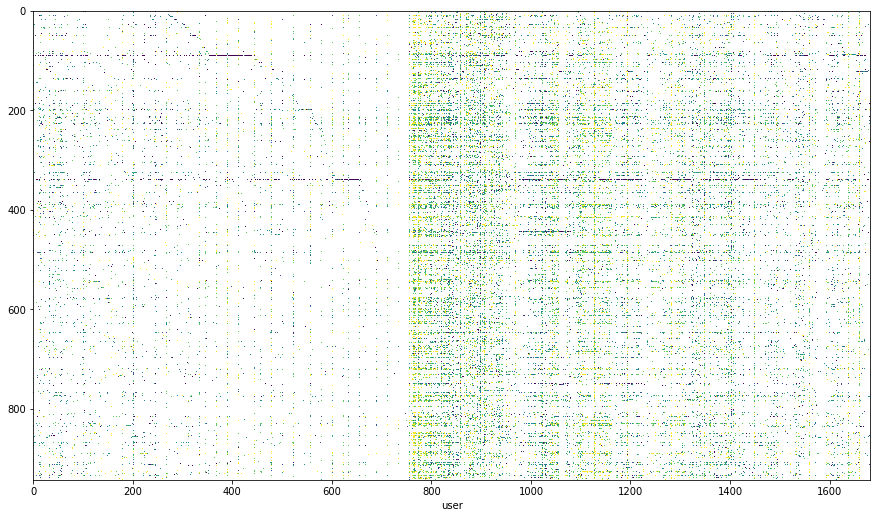

In [29]:
plt.figure(figsize=(15, 15))
plt.imshow(dt)
plt.grid(False)
plt.xlabel('item')
plt.xlabel('user')
plt.show()

In [33]:
df.user.nunique()

943

## 베이스 라인 모형

### 사용자 아이디와 상품 아이디로 예측하는 단순한 모형
- 사용자와 상품의 평균 평점의 합으로 계산
$$\hat{r}_{ui}={\mu}+b_u+b_i$$
- 다음 오차 함수의 최소화가 목표
$$\sum_{r_{ui}{\in}R_{train}}\big(r_{ui}-({\mu}+b_u+b_i)\big)^2$$
- 과적합을 줄이기 위한 정규항 추가
$$\sum_{r_{ui}{\in}R_{train}}\big(r_{ui}-({\mu}+b_u+b_i)\big)^2+{\lambda}({b_u}^2+{b_i}^2)$$

### 모형 학습 알고리즘
- SGD (Stochastic Gradient Descent)
    - reg : 정규화 가중치 (default=.2)
    - learning_rate : 학습률 (default=.005)
    - n_epochs : 반복 횟수 (default=20)
- ALS (Alternating Least Squares)
    - reg_i : 상품에 대한 정규화 가중치 (default=10)
    - reg_u : 사용자에 대한 정규화 가중치 (default=15)
    - n_epochs : 반복횟수 (default=10)
    
### 모형 학습 방법
- 모형 객체 생성
- 모형 셋 생성
- 모수 추정 및 예측
- 성능 평가 함수로 평가

### 성능평가 기준
- RMSE
- MAE
- FCP

In [54]:
from surprise.model_selection import KFold

bsl_param = {'method':'als', 'n_epochs':5, 'reg_u':12, 'reg_i':5}
model  = surprise.BaselineOnly(bsl_options=bsl_param)

acc = np.zeros(3)
cv = KFold(3)
for i, (trainset, testset) in enumerate(cv.split(data)):
    model.fit(trainset)
    pred = model.test(testset)
    acc[i] = surprise.accuracy.rmse(pred, verbose=True)
acc.mean()

Estimating biases using als...
RMSE: 0.9468
Estimating biases using als...
RMSE: 0.9473
Estimating biases using als...
RMSE: 0.9390


0.9443796329201906

In [55]:
from surprise.model_selection import cross_validate

cross_validate(model, data)

Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...


{'test_rmse': array([0.93836776, 0.93592951, 0.93848912, 0.9421805 , 0.95140745]),
 'test_mae': array([0.74464715, 0.74211642, 0.7411136 , 0.74695656, 0.75233828]),
 'fit_time': (0.08397269248962402,
  0.10376501083374023,
  0.10470867156982422,
  0.10875344276428223,
  0.10167503356933594),
 'test_time': (0.13663411140441895,
  0.08379602432250977,
  0.08178067207336426,
  0.08273482322692871,
  0.08178043365478516)}

# 2-3. 협업 필터링 구현 실습<br>
## 이웃 기반 모형
### 유사도 기준
- 평균제곱차이 유사도 (Mean Squared Difference)
    - 유클리드 공간에서의 거리 제곱에 비례하는 값
    - 유사도는 msd 값의 역수로 계산
    - 0이 되는 경우를 대비하여 1을 더해서 역수
- 코사인 유사도
- 피어슨 유사도
    - 두 벡터의 상관계수
    - 1~-1 : 0일 경우에는 상관관계가 없음
- 피어슨-베이스라인 유사도
    - 각 벡터의 기대값을 다눗 평균이 아니라 베이스라인 모형에서 예측한 값을 사용

### 유사도 설정 옵션
- name : 사용할 유사도의 종류 (default='MSD')
- user-based : True인 경우 user-based CF, False인 경우 item-based CF
- min_support : 두 사용자 또는 상품에서 공통적으로 있는 평점의 최소값
- shi

# 과제

In [57]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [58]:
path = './boardgamegeek-reviews/'
reviews = pd.read_csv(path + 'bgg-13m-reviews.csv', index_col=0)
print(len(reviews))
reviews.head()

C:\ProgramData\Anaconda3\envs\keras\lib\site-packages\numpy\lib\arraysetops.py:569: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


13170073


,user,rating,comment,ID,name
0,sidehacker,10.0,NaN,13,Catan
1,Varthlokkur,10.0,NaN,13,Catan
2,dougthonus,10.0,"Currently, this sits on my list as my favorite...",13,Catan
3,cypar7,10.0,"I know it says how many plays, but many, many ...",13,Catan
4,ssmooth,10.0,NaN,13,Catan


In [60]:
d_reviews = reviews.dropna()
print(len(d_reviews))

2637756


In [62]:
detail_data = pd.read_csv(path + 'games_detailed_info.csv', low_memory=False, index_col=0)

use_col_ind = np.where(detail_data.isnull().sum() / len(detail_data)  < .5)[0]
detailed = detail_data[detail_data.columns[use_col_ind]]
print(len(detailed))
detailed.head()

17063


,Board Game Rank,average,averageweight,bayesaverage,boardgameartist,boardgamecategory,boardgamedesigner,boardgamefamily,boardgamemechanic,boardgamepublisher,...,suggested_language_dependence,suggested_num_players,suggested_playerage,thumbnail,trading,type,usersrated,wanting,wishing,yearpublished
0,327,7.19118,2.3399,7.03556,"['Volkan Baga', 'Tanja Donner', 'Pete Fenlon',...",['Negotiation'],['Klaus Teuber'],"['Catan', 'Promotional Board Games']","['Dice Rolling', 'Modular Board', 'Route/Netwo...","['KOSMOS', '999 Games', 'Albi', 'Astrel Games'...",...,"[OrderedDict([('@level', '36'), ('@value', 'No...","[OrderedDict([('@numplayers', '1'), ('result',...","[OrderedDict([('@value', '2'), ('@numvotes', '...",https://cf.geekdo-images.com/thumb/img/g8LvJsd...,1685,boardgame,85332,453,4729,1995
1,151,7.42605,1.9247,7.32084,"['Doris Matthäus', 'Anne Pätzke', 'Chris Quill...","['City Building', 'Medieval', 'Territory Build...",['Klaus-Jürgen Wrede'],"['Carcassonne', 'Country: France']","['Area Control / Area Influence', 'Tile Placem...","['Hans im Glück', '999 Games', 'Albi', 'Bard C...",...,"[OrderedDict([('@level', '1'), ('@value', 'No ...","[OrderedDict([('@numplayers', '1'), ('result',...","[OrderedDict([('@value', '2'), ('@numvotes', '...",https://cf.geekdo-images.com/thumb/img/kqE4YJS...,1477,boardgame,85052,498,5403,2000
2,74,7.63799,2.4220,7.54432,"['Josh Cappel', 'Christian Hanisch', 'Régis Mo...",['Medical'],['Matt Leacock'],['Pandemic'],"['Action Point Allowance System', 'Cooperative...","['Z-Man Games, Inc.', '(Unknown)', 'Albi', 'As...",...,"[OrderedDict([('@level', '21'), ('@value', 'No...","[OrderedDict([('@numplayers', '1'), ('result',...","[OrderedDict([('@value', '2'), ('@numvotes', '...",https://cf.geekdo-images.com/thumb/img/HEKrtpT...,1977,boardgame,83486,614,7655,2008
3,45,7.78118,2.3397,7.68858,"['Antoine Bauza', 'Miguel Coimbra']","['Ancient', 'Card Game', 'City Building', 'Civ...",['Antoine Bauza'],"['7 Wonders', 'Tableau Building']","['Card Drafting', 'Hand Management', 'Set Coll...","['Repos Production', 'ADC Blackfire Entertainm...",...,"[OrderedDict([('@level', '1'), ('@value', 'No ...","[OrderedDict([('@numplayers', '1'), ('result',...","[OrderedDict([('@value', '2'), ('@numvotes', '...",https://cf.geekdo-images.com/thumb/img/Grz-qM9...,1162,boardgame,69132,1029,9464,2010
4,76,7.64470,2.3623,7.54296,"['Matthias Catrein', 'Julien Delval', 'Tomasz ...","['Card Game', 'Medieval']",['Donald X. Vaccarino'],"['Crowdfunding: Wspieram', 'Dominion', 'Mensa ...","['Card Drafting', 'Deck / Pool Building', 'Han...","['Rio Grande Games', '999 Games', 'Albi', 'Bar...",...,"[OrderedDict([('@level', '21'), ('@value', 'No...","[OrderedDict([('@numplayers', '1'), ('result',...","[OrderedDict([('@value', '2'), ('@numvotes', '...",https://cf.geekdo-images.com/thumb/img/iPlTR5c...,1806,boardgame,68284,571,6703,2008


In [69]:
detailed

,Board Game Rank,average,averageweight,bayesaverage,boardgameartist,boardgamecategory,boardgamedesigner,boardgamefamily,boardgamemechanic,boardgamepublisher,...,suggested_language_dependence,suggested_num_players,suggested_playerage,thumbnail,trading,type,usersrated,wanting,wishing,yearpublished
0,327,7.19118,2.3399,7.03556,"['Volkan Baga', 'Tanja Donner', 'Pete Fenlon',...",['Negotiation'],['Klaus Teuber'],"['Catan', 'Promotional Board Games']","['Dice Rolling', 'Modular Board', 'Route/Netwo...","['KOSMOS', '999 Games', 'Albi', 'Astrel Games'...",...,"[OrderedDict([('@level', '36'), ('@value', 'No...","[OrderedDict([('@numplayers', '1'), ('result',...","[OrderedDict([('@value', '2'), ('@numvotes', '...",https://cf.geekdo-images.com/thumb/img/g8LvJsd...,1685,boardgame,85332,453,4729,1995
1,151,7.42605,1.9247,7.32084,"['Doris Matthäus', 'Anne Pätzke', 'Chris Quill...","['City Building', 'Medieval', 'Territory Build...",['Klaus-Jürgen Wrede'],"['Carcassonne', 'Country: France']","['Area Control / Area Influence', 'Tile Placem...","['Hans im Glück', '999 Games', 'Albi', 'Bard C...",...,"[OrderedDict([('@level', '1'), ('@value', 'No ...","[OrderedDict([('@numplayers', '1'), ('result',...","[OrderedDict([('@value', '2'), ('@numvotes', '...",https://cf.geekdo-images.com/thumb/img/kqE4YJS...,1477,boardgame,85052,498,5403,2000
2,74,7.63799,2.4220,7.54432,"['Josh Cappel', 'Christian Hanisch', 'Régis Mo...",['Medical'],['Matt Leacock'],['Pandemic'],"['Action Point Allowance System', 'Cooperative...","['Z-Man Games, Inc.', '(Unknown)', 'Albi', 'As...",...,"[OrderedDict([('@level', '21'), ('@value', 'No...","[OrderedDict([('@numplayers', '1'), ('result',...","[OrderedDict([('@value', '2'), ('@numvotes', '...",https://cf.geekdo-images.com/thumb/img/HEKrtpT...,1977,boardgame,83486,614,7655,2008
3,45,7.78118,2.3397,7.68858,"['Antoine Bauza', 'Miguel Coimbra']","['Ancient', 'Card Game', 'City Building', 'Civ...",['Antoine Bauza'],"['7 Wonders', 'Tableau Building']","['Card Drafting', 'Hand Management', 'Set Coll...","['Repos Production', 'ADC Blackfire Entertainm...",...,"[OrderedDict([('@level', '1'), ('@value', 'No ...","[OrderedDict([('@numplayers', '1'), ('result',...","[OrderedDict([('@value', '2'), ('@numvotes', '...",https://cf.geekdo-images.com/thumb/img/Grz-qM9...,1162,boardgame,69132,1029,9464,2010
4,76,7.64470,2.3623,7.54296,"['Matthias Catrein', 'Julien Delval', 'Tomasz ...","['Card Game', 'Medieval']",['Donald X. Vaccarino'],"['Crowdfunding: Wspieram', 'Dominion', 'Mensa ...","['Card Drafting', 'Deck / Pool Building', 'Han...","['Rio Grande Games', '999 Games', 'Albi', 'Bar...",...,"[OrderedDict([('@level', '21'), ('@value', 'No...","[OrderedDict([('@numplayers', '1'), ('result',...","[OrderedDict([('@value', '2'), ('@numvotes', '...",https://cf.geekdo-images.com/thumb/img/iPlTR5c...,1806,boardgame,68284,571,6703,2008
5,142,7.44716,1.8629,7.34375,"['Cyrille Daujean', 'Julien Delval']",['Trains'],['Alan R. Moon'],"['Country: USA', 'Ticket to Ride']","['Card Drafting', 'Hand Management', 'Route/Ne...","['Days of Wonder', 'ADC Blackfire Entertainmen...",...,"[OrderedDict([('@level', '41'), ('@value', 'No...","[OrderedDict([('@numplayers', '1'), ('result',...","[OrderedDict([('@value', '2'), ('@numvotes', '...",https://cf.geekdo-images.com/thumb/img/WRanmC5...,750,boardgame,60558,671,5350,2004
6,25,7.98857,3.6356,7.88432,['Klemens Franz'],"['Animals', 'Economic', 'Farming']",['Uwe Rosenberg'],"['Agricola', 'Animals: Cattle', 'Animals: Hors...","['Area Enclosure', 'Card Drafting', 'Hand Mana...","['Lookout Games', '999 Games', 'Brain Games', ...",...,"[OrderedDict([('@level', '31'), ('@value', 'No...","[OrderedDict([('@numplayers', '1'), ('result',...","[OrderedDict([('@value', '2'), ('@numvotes', '...",https://cf.geekdo-images.com/thumb/img/zl48oz7...,1189,boardgame,57064,1114,9167,2007
7,20,8.03590,3.2887,7.91934,"['Harald Lieske', 'Franz Vohwinkel']","['City Building', 'Economic', 'Farming']",['Andreas Seyfarth'],"['Alea Big Box', 

In [84]:
detailed

,Board Game Rank,average,averageweight,bayesaverage,boardgameartist,boardgamecategory,boardgamedesigner,boardgamefamily,boardgamemechanic,boardgamepublisher,...,suggested_language_dependence,suggested_num_players,suggested_playerage,thumbnail,trading,type,usersrated,wanting,wishing,yearpublished
0,327,7.19118,2.3399,7.03556,"['Volkan Baga', 'Tanja Donner', 'Pete Fenlon',...",['Negotiation'],['Klaus Teuber'],"['Catan', 'Promotional Board Games']","['Dice Rolling', 'Modular Board', 'Route/Netwo...","['KOSMOS', '999 Games', 'Albi', 'Astrel Games'...",...,"[OrderedDict([('@level', '36'), ('@value', 'No...","[OrderedDict([('@numplayers', '1'), ('result',...","[OrderedDict([('@value', '2'), ('@numvotes', '...",https://cf.geekdo-images.com/thumb/img/g8LvJsd...,1685,boardgame,85332,453,4729,1995
1,151,7.42605,1.9247,7.32084,"['Doris Matthäus', 'Anne Pätzke', 'Chris Quill...","['City Building', 'Medieval', 'Territory Build...",['Klaus-Jürgen Wrede'],"['Carcassonne', 'Country: France']","['Area Control / Area Influence', 'Tile Placem...","['Hans im Glück', '999 Games', 'Albi', 'Bard C...",...,"[OrderedDict([('@level', '1'), ('@value', 'No ...","[OrderedDict([('@numplayers', '1'), ('result',...","[OrderedDict([('@value', '2'), ('@numvotes', '...",https://cf.geekdo-images.com/thumb/img/kqE4YJS...,1477,boardgame,85052,498,5403,2000
2,74,7.63799,2.4220,7.54432,"['Josh Cappel', 'Christian Hanisch', 'Régis Mo...",['Medical'],['Matt Leacock'],['Pandemic'],"['Action Point Allowance System', 'Cooperative...","['Z-Man Games, Inc.', '(Unknown)', 'Albi', 'As...",...,"[OrderedDict([('@level', '21'), ('@value', 'No...","[OrderedDict([('@numplayers', '1'), ('result',...","[OrderedDict([('@value', '2'), ('@numvotes', '...",https://cf.geekdo-images.com/thumb/img/HEKrtpT...,1977,boardgame,83486,614,7655,2008
3,45,7.78118,2.3397,7.68858,"['Antoine Bauza', 'Miguel Coimbra']","['Ancient', 'Card Game', 'City Building', 'Civ...",['Antoine Bauza'],"['7 Wonders', 'Tableau Building']","['Card Drafting', 'Hand Management', 'Set Coll...","['Repos Production', 'ADC Blackfire Entertainm...",...,"[OrderedDict([('@level', '1'), ('@value', 'No ...","[OrderedDict([('@numplayers', '1'), ('result',...","[OrderedDict([('@value', '2'), ('@numvotes', '...",https://cf.geekdo-images.com/thumb/img/Grz-qM9...,1162,boardgame,69132,1029,9464,2010
4,76,7.64470,2.3623,7.54296,"['Matthias Catrein', 'Julien Delval', 'Tomasz ...","['Card Game', 'Medieval']",['Donald X. Vaccarino'],"['Crowdfunding: Wspieram', 'Dominion', 'Mensa ...","['Card Drafting', 'Deck / Pool Building', 'Han...","['Rio Grande Games', '999 Games', 'Albi', 'Bar...",...,"[OrderedDict([('@level', '21'), ('@value', 'No...","[OrderedDict([('@numplayers', '1'), ('result',...","[OrderedDict([('@value', '2'), ('@numvotes', '...",https://cf.geekdo-images.com/thumb/img/iPlTR5c...,1806,boardgame,68284,571,6703,2008
5,142,7.44716,1.8629,7.34375,"['Cyrille Daujean', 'Julien Delval']",['Trains'],['Alan R. Moon'],"['Country: USA', 'Ticket to Ride']","['Card Drafting', 'Hand Management', 'Route/Ne...","['Days of Wonder', 'ADC Blackfire Entertainmen...",...,"[OrderedDict([('@level', '41'), ('@value', 'No...","[OrderedDict([('@numplayers', '1'), ('result',...","[OrderedDict([('@value', '2'), ('@numvotes', '...",https://cf.geekdo-images.com/thumb/img/WRanmC5...,750,boardgame,60558,671,5350,2004
6,25,7.98857,3.6356,7.88432,['Klemens Franz'],"['Animals', 'Economic', 'Farming']",['Uwe Rosenberg'],"['Agricola', 'Animals: Cattle', 'Animals: Hors...","['Area Enclosure', 'Card Drafting', 'Hand Mana...","['Lookout Games', '999 Games', 'Brain Games', ...",...,"[OrderedDict([('@level', '31'), ('@value', 'No...","[OrderedDict([('@numplayers', '1'), ('result',...","[OrderedDict([('@value', '2'), ('@numvotes', '...",https://cf.geekdo-images.com/thumb/img/zl48oz7...,1189,boardgame,57064,1114,9167,2007
7,20,8.03590,3.2887,7.91934,"['Harald Lieske', 'Franz Vohwinkel']","['City Building', 'Economic', 'Farming']",['Andreas Seyfarth'],"['Alea Big Box', 

In [85]:
grouped = reviews.groupby(['ID'])['rating'].agg(['mean', 'count']).sort_values('count', ascending=False)

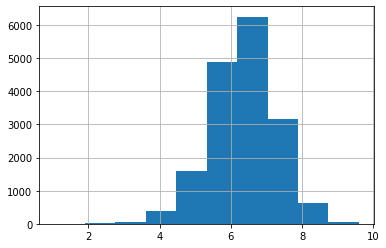

In [96]:
plt.hist(grouped['mean'])
plt.grid(True); plt.show()

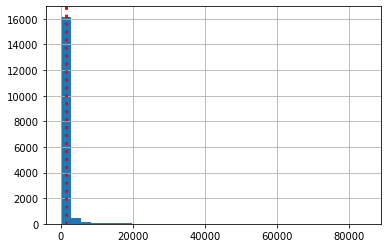

In [109]:
plt.hist(grouped['count'], bins=30)
plt.axvline(grouped['count'].quantile(.9), color='r', lw=3, ls=':')
plt.grid(True); plt.show()

In [98]:
C = grouped['mean'].mean()
print(C)

6.352736385170301


In [100]:
m = grouped['count'].quantile(.9)
m

1373.0

In [110]:
def WR(x, m=m, C=C):
    v = x['count']
    R = x['mean']
    return (v / (v + m) * R) + (m / (m + v) * C)

grouped['score'] = grouped.apply(WR, axis=1)

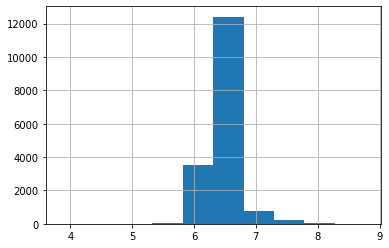

In [114]:
plt.hist(grouped['score'])
plt.grid(True); plt.show()

In [119]:
detailed

,Board Game Rank,average,averageweight,bayesaverage,boardgameartist,boardgamecategory,boardgamedesigner,boardgamefamily,boardgamemechanic,boardgamepublisher,...,suggested_language_dependence,suggested_num_players,suggested_playerage,thumbnail,trading,type,usersrated,wanting,wishing,yearpublished
0,327,7.19118,2.3399,7.03556,"['Volkan Baga', 'Tanja Donner', 'Pete Fenlon',...",['Negotiation'],['Klaus Teuber'],"['Catan', 'Promotional Board Games']","['Dice Rolling', 'Modular Board', 'Route/Netwo...","['KOSMOS', '999 Games', 'Albi', 'Astrel Games'...",...,"[OrderedDict([('@level', '36'), ('@value', 'No...","[OrderedDict([('@numplayers', '1'), ('result',...","[OrderedDict([('@value', '2'), ('@numvotes', '...",https://cf.geekdo-images.com/thumb/img/g8LvJsd...,1685,boardgame,85332,453,4729,1995
1,151,7.42605,1.9247,7.32084,"['Doris Matthäus', 'Anne Pätzke', 'Chris Quill...","['City Building', 'Medieval', 'Territory Build...",['Klaus-Jürgen Wrede'],"['Carcassonne', 'Country: France']","['Area Control / Area Influence', 'Tile Placem...","['Hans im Glück', '999 Games', 'Albi', 'Bard C...",...,"[OrderedDict([('@level', '1'), ('@value', 'No ...","[OrderedDict([('@numplayers', '1'), ('result',...","[OrderedDict([('@value', '2'), ('@numvotes', '...",https://cf.geekdo-images.com/thumb/img/kqE4YJS...,1477,boardgame,85052,498,5403,2000
2,74,7.63799,2.4220,7.54432,"['Josh Cappel', 'Christian Hanisch', 'Régis Mo...",['Medical'],['Matt Leacock'],['Pandemic'],"['Action Point Allowance System', 'Cooperative...","['Z-Man Games, Inc.', '(Unknown)', 'Albi', 'As...",...,"[OrderedDict([('@level', '21'), ('@value', 'No...","[OrderedDict([('@numplayers', '1'), ('result',...","[OrderedDict([('@value', '2'), ('@numvotes', '...",https://cf.geekdo-images.com/thumb/img/HEKrtpT...,1977,boardgame,83486,614,7655,2008
3,45,7.78118,2.3397,7.68858,"['Antoine Bauza', 'Miguel Coimbra']","['Ancient', 'Card Game', 'City Building', 'Civ...",['Antoine Bauza'],"['7 Wonders', 'Tableau Building']","['Card Drafting', 'Hand Management', 'Set Coll...","['Repos Production', 'ADC Blackfire Entertainm...",...,"[OrderedDict([('@level', '1'), ('@value', 'No ...","[OrderedDict([('@numplayers', '1'), ('result',...","[OrderedDict([('@value', '2'), ('@numvotes', '...",https://cf.geekdo-images.com/thumb/img/Grz-qM9...,1162,boardgame,69132,1029,9464,2010
4,76,7.64470,2.3623,7.54296,"['Matthias Catrein', 'Julien Delval', 'Tomasz ...","['Card Game', 'Medieval']",['Donald X. Vaccarino'],"['Crowdfunding: Wspieram', 'Dominion', 'Mensa ...","['Card Drafting', 'Deck / Pool Building', 'Han...","['Rio Grande Games', '999 Games', 'Albi', 'Bar...",...,"[OrderedDict([('@level', '21'), ('@value', 'No...","[OrderedDict([('@numplayers', '1'), ('result',...","[OrderedDict([('@value', '2'), ('@numvotes', '...",https://cf.geekdo-images.com/thumb/img/iPlTR5c...,1806,boardgame,68284,571,6703,2008
5,142,7.44716,1.8629,7.34375,"['Cyrille Daujean', 'Julien Delval']",['Trains'],['Alan R. Moon'],"['Country: USA', 'Ticket to Ride']","['Card Drafting', 'Hand Management', 'Route/Ne...","['Days of Wonder', 'ADC Blackfire Entertainmen...",...,"[OrderedDict([('@level', '41'), ('@value', 'No...","[OrderedDict([('@numplayers', '1'), ('result',...","[OrderedDict([('@value', '2'), ('@numvotes', '...",https://cf.geekdo-images.com/thumb/img/WRanmC5...,750,boardgame,60558,671,5350,2004
6,25,7.98857,3.6356,7.88432,['Klemens Franz'],"['Animals', 'Economic', 'Farming']",['Uwe Rosenberg'],"['Agricola', 'Animals: Cattle', 'Animals: Hors...","['Area Enclosure', 'Card Drafting', 'Hand Mana...","['Lookout Games', '999 Games', 'Brain Games', ...",...,"[OrderedDict([('@level', '31'), ('@value', 'No...","[OrderedDict([('@numplayers', '1'), ('result',...","[OrderedDict([('@value', '2'), ('@numvotes', '...",https://cf.geekdo-images.com/thumb/img/zl48oz7...,1189,boardgame,57064,1114,9167,2007
7,20,8.03590,3.2887,7.91934,"['Harald Lieske', 'Franz Vohwinkel']","['City Building', 'Economic', 'Farming']",['Andreas Seyfarth'],"['Alea Big Box', 

In [123]:
detailed.columns

Index(['Board Game Rank', 'average', 'averageweight', 'bayesaverage',
       'boardgameartist', 'boardgamecategory', 'boardgamedesigner',
       'boardgamefamily', 'boardgamemechanic', 'boardgamepublisher',
       'description', 'id', 'image', 'maxplayers', 'maxplaytime', 'median',
       'minage', 'minplayers', 'minplaytime', 'numcomments', 'numweights',
       'owned', 'playingtime', 'primary', 'stddev',
       'suggested_language_dependence', 'suggested_num_players',
       'suggested_playerage', 'thumbnail', 'trading', 'type', 'usersrated',
       'wanting', 'wishing', 'yearpublished'],
      dtype='object')

In [124]:
reviews.shape

(13170073, 5)

In [126]:
reviews.dropna().shape

(2637756, 5)

# EDA

## reviews

In [157]:
reviews.head()

,user,rating,comment,ID,name
0,sidehacker,10.0,NaN,13,Catan
1,Varthlokkur,10.0,NaN,13,Catan
2,dougthonus,10.0,"Currently, this sits on my list as my favorite...",13,Catan
3,cypar7,10.0,"I know it says how many plays, but many, many ...",13,Catan
4,ssmooth,10.0,NaN,13,Catan


In [131]:
reviews.shape

(13170073, 5)

In [129]:
reviews.user.nunique()

289913

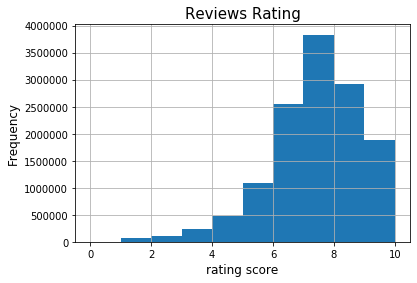

In [219]:
plt.figure(facecolor='w')
reviews.rating.hist()
plt.title('Reviews Rating', fontsize=15)
plt.xlabel('rating score', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()

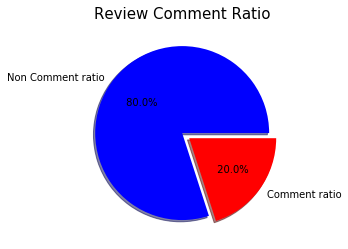

In [217]:
non_num_reviews = reviews.comment.isnull().sum() / len(reviews)
num_reviews = 1 - reviews.comment.isnull().sum() / len(reviews)

plt.figure(facecolor='w')
plt.pie([non_num_reviews, num_reviews],
        explode=[0, .1], 
        shadow=True, colors=['b', 'r'],
        labels=['Non Comment ratio', 'Comment ratio'],
        autopct="%5.1f%%")
plt.title('Review Comment Ratio', fontsize=15)
plt.show()

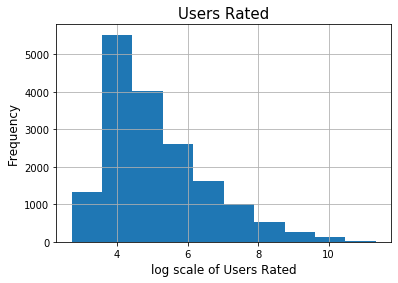

In [218]:
plt.figure(facecolor='w')
np.log(reviews.groupby('ID')['rating'].agg(['mean', 'count'])['count']).hist()
plt.xlabel('log scale of Users Rated', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Users Rated', fontsize=15)
plt.show()

## Games

In [155]:
games = pd.read_csv(path + '2019-05-02.csv')

In [156]:
games.head()

,ID,Name,Year,Rank,Average,Bayes average,Users rated,URL,Thumbnail
0,174430,Gloomhaven,2017,1,8.90,8.611,24574,/boardgame/174430/gloomhaven,https://cf.geekdo-images.com/micro/img/8JYMPXd...
1,161936,Pandemic Legacy: Season 1,2015,2,8.64,8.489,30921,/boardgame/161936/pandemic-legacy-season-1,https://cf.geekdo-images.com/micro/img/KbAKyhb...
2,182028,Through the Ages: A New Story of Civilization,2015,3,8.53,8.258,15551,/boardgame/182028/through-ages-new-story-civil...,https://cf.geekdo-images.com/micro/img/APvZ_BY...
3,167791,Terraforming Mars,2016,4,8.40,8.242,38331,/boardgame/167791/terraforming-mars,https://cf.geekdo-images.com/micro/img/71v8jF5...
4,12333,Twilight Struggle,2005,5,8.33,8.175,34268,/boardgame/12333/twilight-struggle,https://cf.geekdo-images.com/micro/img/uStZr7_...


In [158]:
games.shape

(17065, 9)

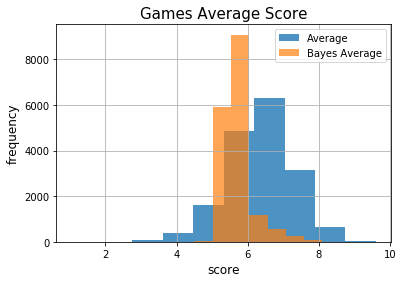

In [220]:
plt.figure(facecolor='w')
games.Average.hist(alpha=.8, label='Average')
games['Bayes average'].hist(alpha=.7, label='Bayes Average')
plt.xlabel('score', fontsize=12)
plt.ylabel('frequency', fontsize=12)
plt.title('Games Average Score', fontsize=15)
plt.legend()
plt.show()

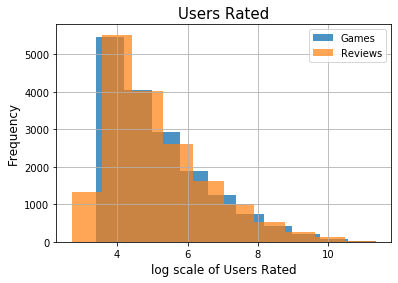

In [221]:
plt.figure(facecolor='w')
a1, b1, c1 = plt.hist(np.log(games['Users rated']), alpha=.8, label='Games')
a2, b2, c2 = plt.hist(np.log(reviews.groupby('ID')['rating'].agg(['mean', 'count'])['count']),
                     alpha=.7, label='Reviews')
plt.grid(True)
plt.legend()
plt.xlabel('log scale of Users Rated', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Users Rated', fontsize=15)
plt.show()

In [200]:
sum(a1), sum(a2)

(17065.0, 17065.0)

In [201]:
b1, b2

(array([ 3.40119738,  4.19580723,  4.99041707,  5.78502691,  6.57963676,
         7.3742466 ,  8.16885644,  8.96346629,  9.75807613, 10.55268598,
        11.34729582]),
 array([ 2.7080502 ,  3.5716935 ,  4.43533679,  5.29898008,  6.16262338,
         7.02626667,  7.88990997,  8.75355326,  9.61719656, 10.48083985,
        11.34448314]))

In [211]:
games.sort_values('ID')['Users rated'].values

array([ 4777,   523, 13455, ...,    48,    36,    34], dtype=int64)

In [212]:
reviews.groupby('ID')['rating'].count().values

array([ 4775,   523, 13458, ...,    51,    36,    34], dtype=int64)

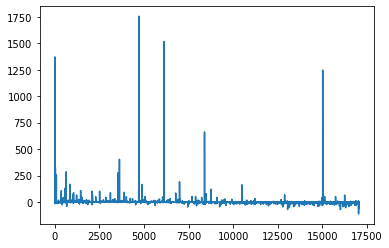

In [222]:
plt.figure(facecolor='w')
plt.plot(games.sort_values('ID')['Users rated'].values - reviews.groupby('ID')['rating'].count().values)

## Detailed

In [174]:
detailed.head()

,Board Game Rank,average,averageweight,bayesaverage,boardgameartist,boardgamecategory,boardgamedesigner,boardgamefamily,boardgamemechanic,boardgamepublisher,...,suggested_language_dependence,suggested_num_players,suggested_playerage,thumbnail,trading,type,usersrated,wanting,wishing,yearpublished
0,327,7.19118,2.3399,7.03556,"['Volkan Baga', 'Tanja Donner', 'Pete Fenlon',...",['Negotiation'],['Klaus Teuber'],"['Catan', 'Promotional Board Games']","['Dice Rolling', 'Modular Board', 'Route/Netwo...","['KOSMOS', '999 Games', 'Albi', 'Astrel Games'...",...,"[OrderedDict([('@level', '36'), ('@value', 'No...","[OrderedDict([('@numplayers', '1'), ('result',...","[OrderedDict([('@value', '2'), ('@numvotes', '...",https://cf.geekdo-images.com/thumb/img/g8LvJsd...,1685,boardgame,85332,453,4729,1995
1,151,7.42605,1.9247,7.32084,"['Doris Matthäus', 'Anne Pätzke', 'Chris Quill...","['City Building', 'Medieval', 'Territory Build...",['Klaus-Jürgen Wrede'],"['Carcassonne', 'Country: France']","['Area Control / Area Influence', 'Tile Placem...","['Hans im Glück', '999 Games', 'Albi', 'Bard C...",...,"[OrderedDict([('@level', '1'), ('@value', 'No ...","[OrderedDict([('@numplayers', '1'), ('result',...","[OrderedDict([('@value', '2'), ('@numvotes', '...",https://cf.geekdo-images.com/thumb/img/kqE4YJS...,1477,boardgame,85052,498,5403,2000
2,74,7.63799,2.4220,7.54432,"['Josh Cappel', 'Christian Hanisch', 'Régis Mo...",['Medical'],['Matt Leacock'],['Pandemic'],"['Action Point Allowance System', 'Cooperative...","['Z-Man Games, Inc.', '(Unknown)', 'Albi', 'As...",...,"[OrderedDict([('@level', '21'), ('@value', 'No...","[OrderedDict([('@numplayers', '1'), ('result',...","[OrderedDict([('@value', '2'), ('@numvotes', '...",https://cf.geekdo-images.com/thumb/img/HEKrtpT...,1977,boardgame,83486,614,7655,2008
3,45,7.78118,2.3397,7.68858,"['Antoine Bauza', 'Miguel Coimbra']","['Ancient', 'Card Game', 'City Building', 'Civ...",['Antoine Bauza'],"['7 Wonders', 'Tableau Building']","['Card Drafting', 'Hand Management', 'Set Coll...","['Repos Production', 'ADC Blackfire Entertainm...",...,"[OrderedDict([('@level', '1'), ('@value', 'No ...","[OrderedDict([('@numplayers', '1'), ('result',...","[OrderedDict([('@value', '2'), ('@numvotes', '...",https://cf.geekdo-images.com/thumb/img/Grz-qM9...,1162,boardgame,69132,1029,9464,2010
4,76,7.64470,2.3623,7.54296,"['Matthias Catrein', 'Julien Delval', 'Tomasz ...","['Card Game', 'Medieval']",['Donald X. Vaccarino'],"['Crowdfunding: Wspieram', 'Dominion', 'Mensa ...","['Card Drafting', 'Deck / Pool Building', 'Han...","['Rio Grande Games', '999 Games', 'Albi', 'Bar...",...,"[OrderedDict([('@level', '21'), ('@value', 'No...","[OrderedDict([('@numplayers', '1'), ('result',...","[OrderedDict([('@value', '2'), ('@numvotes', '...",https://cf.geekdo-images.com/thumb/img/iPlTR5c...,1806,boardgame,68284,571,6703,2008


In [175]:
detailed.shape

(17063, 35)

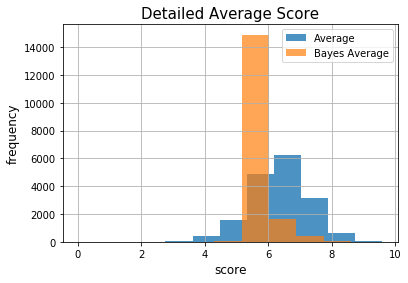

In [227]:
plt.figure(facecolor='w')
detailed.average.hist(alpha=.8, label='Average')
detailed['bayesaverage'].hist(alpha=.7, label='Bayes Average')
plt.xlabel('score', fontsize=12)
plt.ylabel('frequency', fontsize=12)
plt.title('Detailed Average Score', fontsize=15)
plt.legend()
plt.show()

No handles with labels found to put in legend.


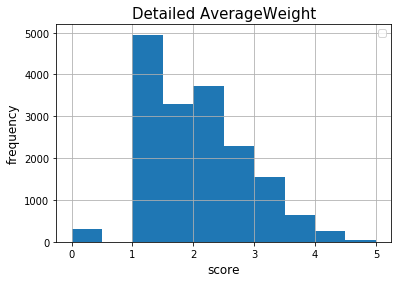

In [230]:
plt.figure(facecolor='w')
detailed.averageweight.hist()
plt.xlabel('score', fontsize=12)
plt.ylabel('frequency', fontsize=12)
plt.title('Detailed AverageWeight', fontsize=15)
plt.legend()
plt.show()